# 1.1 Linux

Our current experience with the Linux operating system is based upon the usage of the Windows 10 Linux emulator. This emulator allows for bash usage inside the Windows environment.

The experience is that the use of a UNIX command line system within the Windows environment really enriches the experience of programming, as it is much faster write simple code instead of navigating the file explorer and reading or altering text files. Also it is easy to create your own function aliases, use SSH to access your computer at home or experience the rich diversity of libraries offered via the commandline.

# Vibrating Strings


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def vibrate_1d():
    L = 1.
    N = 10
    c = 1

    dx = L/N
    dt = 0.001
    t_max = 1000
    C = (c*dt/dx)

    u = np.zeros((3,N))
    
    for i in range(0, N):
        u[2,i] = np.sin(2*np.pi*(i*dx))
            
    for j in range(0,N-2):
        for i in range(1, N-1):
            u[0,:] = u[1,:]
            u[1,:] = u[2,:]
            
            u[2,i] = u[1,i] - 0.5*C**2*(u[1,i+1] - 2* u[1,i] + u[1,i-1]) - u[0,i]
            
            #Enforce boundary conditions
            u[2,0] = 0
            u[2,N-1] = 0
        print(u[2])
        
        
vibrate_1d()



[ 0.00000000e+00  5.87796478e-01  1.81630019e-05  6.57154809e-05
  5.87752395e-05  2.93863239e-05 -1.12271687e-05 -4.75522645e-05
 -9.51032740e-05  0.00000000e+00]
[ 0.00000000e+00  5.87787396e-05 -4.40841083e-09  3.63300653e-09
  4.40802610e-09  3.49977042e-09  1.25472136e-09 -1.25480884e-13
 -9.51032740e-09  0.00000000e+00]
[ 0.00000000e+00  5.87809439e-09 -9.16396129e-13  1.42945168e-13
  2.65806942e-13  2.87227684e-13  1.25464049e-13  4.75497548e-13
 -9.51056514e-13  0.00000000e+00]
[ 0.00000000e+00  5.87855258e-13 -1.28179634e-16  1.01057869e-18
  1.22192595e-17  2.24489550e-17 -1.12295950e-17  9.51031420e-17
 -9.51104066e-17  0.00000000e+00]
[ 0.00000000e+00  5.87919348e-17 -1.58080891e-20 -5.09114701e-22
  9.95036563e-23  2.80637027e-21 -5.87825692e-21  1.42661284e-20
 -9.51175397e-21  0.00000000e+00]
[ 0.00000000e+00  5.87998389e-21 -1.84935237e-24 -5.57941852e-26
 -1.30365358e-25  5.74556391e-25 -1.30116084e-24  1.90226560e-24
 -9.51270510e-25  0.00000000e+00]
[ 0.00000000e+00

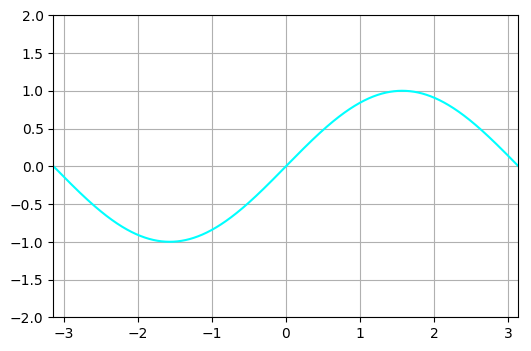

In [19]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# plt.style.use('dark_background')

fig = plt.figure()
fig.set_dpi(100)
ax1 = fig.add_subplot(1,1,1)

#Wave speed
c = 1

#x axis
x0 = np.linspace(-pi,pi,10000)

#Initial time
t0 = 0

#Time increment
dt = 0.05

#Wave equation solution
def u(x,t):
    return 0.5*(np.sin(x+c*t) + np.sin(x-c*t))

a = []

for i in range(500):
    value = u(x0,t0)
    t0 = t0 + dt
    a.append(value)

k = 0
def animate(i):
    global k
    x = a[k]
    k += 1
    ax1.clear()
    plt.plot(x0,x,color='cyan')
    plt.grid(True)
    plt.ylim([-2,2])
    plt.xlim([-pi,pi])

anim = animation.FuncAnimation(fig,animate,frames=360,interval=20)

#plt.show()
from IPython.display import HTML
HTML(anim.to_jshtml())

In [26]:
def time_diffusion_2d(video):
#video = 'y'
    L = 1.
    N = 90
    D = 1
    dx = L/N
    dt = 0.0001
    t_max = 1.0001
    C = (dt * D)/(dx**2)

    u = np.zeros((2,N))

        #Since the solution depends only on the y-coordinate
        #with these initial and boundary conditions
    for j in range(1, N-1):
        u[1,j] = C*(u[0,j] + u[0,j] + u[0,j+1] + u[0,j-1])

        #Enforce boundary conditions
    u[1,0] = 0
    u[1,N-1] = 1
    i = 0

    img = np.zeros((N,N))

    for t in np.arange(0, t_max, dt):
        for j in range(1, N-1):
            u[0,:] = u[1,:]

            u[1,j] = u[0,j] + C*(u[0,j] + u[0,j] + u[0,j+1] + u[0,j-1] - 4*u[0,j])

                #Enforce boundary conditions
            u[1,0] = 0
            u[1,N-1] = 1

        if t == 0 or t == 0.001 or t == 0.01 or t == 0.1 or t== 1:
            tmp = np.fliplr([u[1,:]])[0]
            for i in range(0,len(img)):
                img[:,i] = tmp

            plt.figure()
            plt.axis('off')
            plt.imshow(img, cmap = 'viridis')
            if t == 1:
                plt.colorbar()
                #plt.savefig("img_%f.png" %t, bbox_inches='tight')
            plt.show()
        if video == 'y':

            fig = plt.figure()
            ax = plt.axes(xlim=(0,1), ylim=(0,1))
            line, = ax.plot([], [])
            anim = animation.FuncAnimation(fig, animate2d, init_func=init, frames=200, interval=20, blit=True)
            

#def init():
#    line.set_data([], [])
#    return line

#def animate2d(i, u, dx):
    
#    x = np.arange(0, 1, dx)
#    y = u[1,:]
#    line.set_data(x,y)
#    return line
        #    if t in np.arange(0, 1, 0.1): 
        #        tmp = np.fliplr([u[1,:]])[0]
        #        for i in range(0,len(img)):
        #            img[:,i] = tmp

        #        plt.figure()
        #        plt.axis('off')
        #        plt.imshow(img, cmap = 'viridis')
        #        plt.colorbar()
                #plt.savefig("vid_%f.png" %t, bbox_inches='tight')
        #        plt.show()
            

    
#time_diffusion_2d('n')

In [65]:
def jacobi_iteration():
    N = 4
    old = np.zeros((N,N))
    new = np.zeros((N,N))
    
    
    epsilon = 10**(-2)
    
    #initial conditions
    old[0][:] = 1
    old[N-1][:] = 0
    
    print(old)
    
    while True:
        for j in range(0,N-1):
            for i in range(0,N-1):
                new[j][i] = 0.25*(old[j][i+1] + old[j][i-1] + old[j+1][i] + old[j-1][i])
                if np.absolute(new[j][i]-old[j][i]) < epsilon:
                    print(new[j][i])
                    print(old[j][i])
                    break
                print(np.absolute(new[j][i]-old[j][i]))
            #new[j][N-1] = new[j][0]
            new[j][N-1] = 0.25*(old[j][0] + old[j][N-2] + old[j+1][i] + old[j-1][i])
            new[0][:] = 1
            new[N-1][:] = 0
        #if now == 'yes':
        #    break
        
        old = new 
    print(new)      
jacobi_iteration()

[[1. 1. 1. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
0.5
0.5
0.5
0.25
0.25
0.25
0.0
0.0
0.5625
0.5625
0.375
0.375
0.09375
0.09375
0.59375
0.59375
0.4375
0.4375
0.138671875
0.138671875
0.609375
0.609375
0.45849609375
0.45849609375
0.150634765625
0.150634765625
0.6146240234375
0.6146240234375
0.465606689453125
0.465606689453125
0.15447235107421875
0.15447235107421875
0.6164016723632812
0.6164016723632812
0.4677581787109375
0.4677581787109375
0.15569448471069336
0.15569448471069336
0.6169395446777344
0.6169395446777344
0.4684380292892456
0.4684380292892456
0.15607529878616333
0.15607529878616333
0.6171095073223114
0.6171095073223114
0.468652106821537
0.468652106821537
0.1561951097100973
0.1561951097100973
0.6171630267053843
0.6171630267053843
0.4687192402780056
0.4687192402780056
0.15623276110272855
0.15623276110272855
0.6171798100695014
0.6171798100695014
0.46874033714993857
0.46874033714993857
0.15624458437378053
0.15624458437378053
0.6171850842874846
0.6171850842874846
0.468746

0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46

0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46

0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.61

0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15

0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15

0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15

0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46

0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46

0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15

0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15

0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.61

0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.

0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15

0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.

0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.

0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.

0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.61

0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46

0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46

0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.

0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46

0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.61

0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15

0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15

0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.

0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15

0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46

0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.61

0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46

0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.

0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15

0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.61

0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15

0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.61

0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15

0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15

0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15

0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46

0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.

0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46

0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15

0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46

0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15

0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15

0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.

0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15

0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.

0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.61

0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.61

0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15625
0.6171875
0.6171875
0.46875
0.46875
0.15625
0.15

KeyboardInterrupt: 